In [26]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arkag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arkag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arkag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
#Importing the data with

columns_name = ['Id','Entity','Sentiment','Text']
df = pd.read_csv('twitter_training.csv', names = columns_name)

In [28]:
df.shape

(74682, 4)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [30]:
df.isnull().any().sum()

np.int64(1)

In [31]:
df.dropna(inplace = True)

In [32]:
df.isnull().any().sum()

np.int64(0)

In [33]:
df.duplicated().sum()

np.int64(2341)

In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: count, dtype: int64


In [37]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

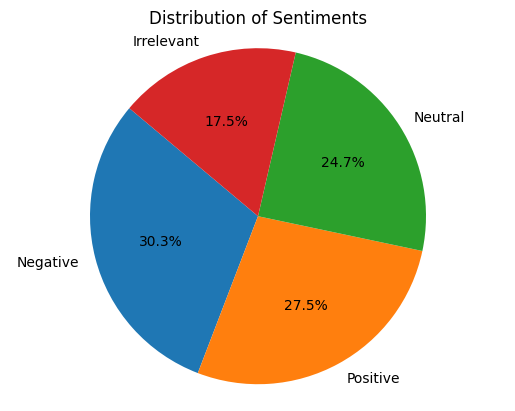

In [38]:
#Basic EDA with piechart

sentiment_values = df['Sentiment'].value_counts()

plt.pie(sentiment_values, labels=sentiment_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')
plt.show()

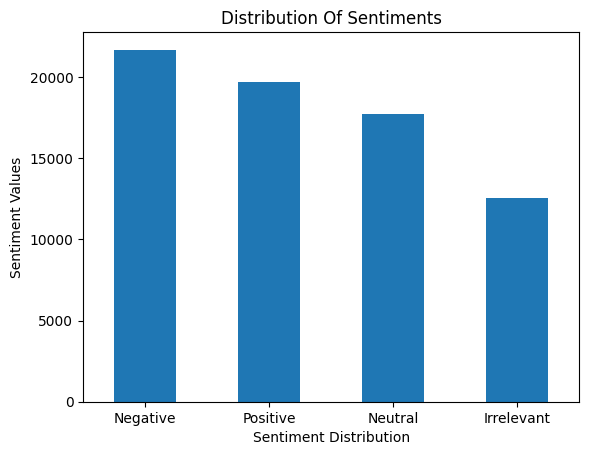

In [39]:
#Basic Visualization With barplot
sentiment_counts.plot(kind = 'bar')
plt.title('Distribution Of Sentiments')
plt.xlabel('Sentiment Distribution')
plt.ylabel('Sentiment Values')
plt.xticks(rotation = 0)
plt.show()

In [40]:
df.columns

Index(['Id', 'Entity', 'Sentiment', 'Text'], dtype='object')

In [41]:
df

,Id,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [42]:
df['Text'] = df['Text'].str.lower()

In [43]:
df

,Id,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...


In [44]:
#Lemmatizing The text for better result

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
    return ''.join(lemmatized_text)

df['Lemmatized Text'] = df['Text'].apply(lemmatize_text)

In [45]:
df.head(4)

,Id,Entity,Sentiment,Text,Lemmatized Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...


In [46]:
#Removing all the URLS, Usernames, hastags, symbols, special characters,numbers from the dataset

def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]','',str(text))
    cleaned_text = re.sub(r'https\S+', '', cleaned_text)
    cleaned_text = re.sub(r'@\w+','',cleaned_text)
    cleaned_text = re.sub(r'<[^>]+>','',cleaned_text)
    cleaned_text = re.sub(r'#\w+','',cleaned_text)
    return cleaned_text

df['Cleaned Text'] = df['Lemmatized Text'].apply(clean_text)

In [47]:
df.head(5)

,Id,Entity,Sentiment,Text,Lemmatized Text,Cleaned Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [48]:
#Removing stopwords from the data set

stop_words = set(stopwords.words('english')) #Selecting the stopwords of english language

def filtered_text(text):
    words = text.split()
    cleaned_text = [w for w in words if not w.lower() in stop_words]
    return " ".join(cleaned_text)

df['Filtered Text'] = df['Cleaned Text'].apply(filtered_text)

In [49]:
df.head(7)

,Id,Entity,Sentiment,Text,Lemmatized Text,Cleaned Text,Filtered Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,im getting borderlands murder
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,im getting borderlands murder
6,2402,Borderlands,Positive,so i spent a few hours making something for fu...,so i spent a few hours making something for fu...,so i spent a few hours making something for fu...,spent hours making something fun dont know hug...


In [50]:
#Changing the irrelevant sentiments to neutral
df['Sentiment'] = df['Sentiment'].replace('Irrelevant','Neutral')

In [51]:
#Measuring sentiment intensity using lexicon based sentiment intensity analyzer : Vader


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def sentiment_measured(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        sentiment = 'Positive'
    elif compound <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment

df['SIA_Value'] = df['Filtered Text'].apply(sentiment_measured)  

In [52]:
df.head(10)

,Id,Entity,Sentiment,Text,Lemmatized Text,Cleaned Text,Filtered Text,SIA_Value
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting borderlands murder,Negative
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...,coming borders kill,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,im getting borderlands kill,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming borderlands murder,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,im getting borderlands murder,Negative
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,im getting borderlands murder,Negative
6,2402,Borderlands,Positive,so i spent a few hours making something for fu...,so i spent a few hours making something for fu...,so i spent a few hours making something for fu...,spent hours making something fun dont know hug...,Positive
7,2402,Borderlands,Positive,so i spent a couple of hours doing something f...,so i spent a couple of hours doing something f...,so i spent a couple of hours doing something f...,spent couple hours something fun dont know im ...,Positive
8,2402,Borderlands,Positive,so i spent a few hours doing something for fun...,so i spent a few hours doing something for fun...,so i spent a few hours doing something for fun...,spent hours something fun dont know im huge bo...,Positive
9,2402,Borderlands,Positive,so i spent a few hours making something for fu...,so i spent a few hours making something for fu...,so i spent a few hours making something for fu...,spent hours making something fun dont know hug...,Positive


In [53]:
sentiment_distribution = df['SIA_Value'].value_counts()

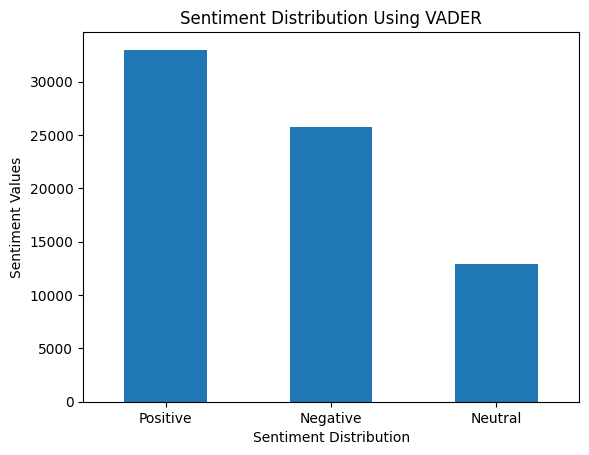

In [54]:
sentiment_distribution.plot(kind = 'bar')
plt.title('Sentiment Distribution Using VADER')
plt.xlabel('Sentiment Distribution')
plt.ylabel('Sentiment Values')
plt.xticks(rotation = 0)
plt.show()

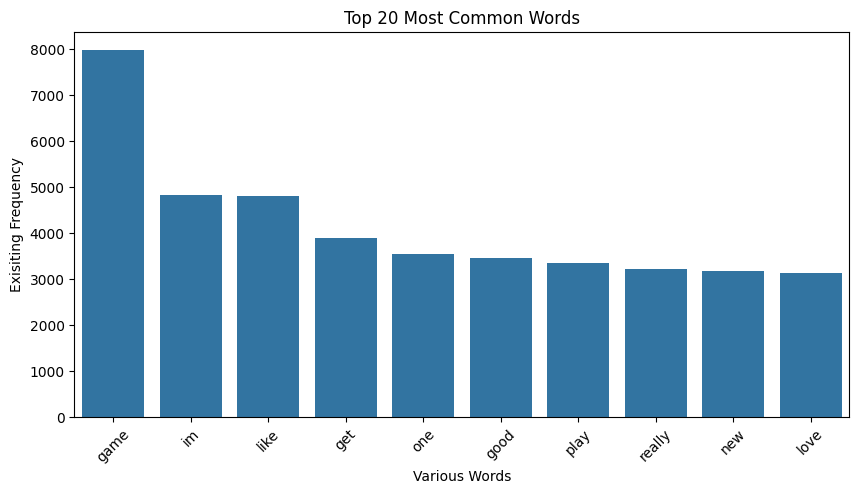

In [69]:
#Frequency Analysis of words from the text
from collections import Counter

words = ' '.join(df['Filtered Text']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)

# Plot the top N most common words
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("Top 20 Most Common Words")
plt.xlabel("Various Words")
plt.ylabel("Exisiting Frequency")
plt.xticks(rotation=45)
plt.show()

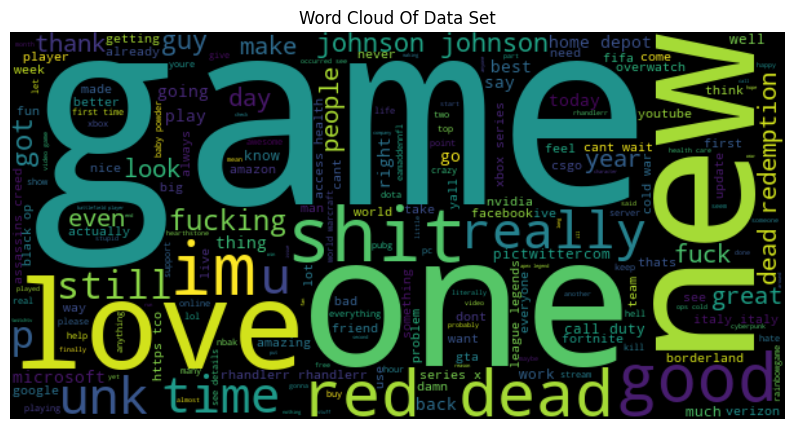

In [67]:
#Word Cloud Of The Data Set
from wordcloud import WordCloud

lemmatized_data = ' '.join(df['Filtered Text'].dropna())
wordcloud = WordCloud(width=600, height=300).generate(lemmatized_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Of Data Set")
plt.show()